In [21]:
library(dplyr)
library(ggplot2)
library(tibble)
library(DOSE)
library(wesanderson)
library(RColorBrewer)
library(ComplexHeatmap)
library(circlize)
library(ggpubr)
library(ggpubr)
library(rstatix)

In [22]:
data <- read.csv("../Data/Cells_for_heatmap.csv", row.names = 1)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“readTableHeader нашел неполную последнюю строку в '../Data/Cells_for_heatmap.csv'”


In [23]:
colnames(data) <- c('ARPE19.Control_1', 
                    'ARPE19.Control_2', 
                    'ARPE19.Control_3', 
                    'ARPE19.Control_4', 
                    'ARPE19.SIRT6.KO_1', 
                    'ARPE19.SIRT6.KO_2', 
                    'ARPE19.SIRT6.KO_3', 
                    'ARPE19.SIRT6.KO_4', 
                    'HeLa.Control_1', 'HeLa.Control_2', 'HeLa.Control_3', 'HeLa.Control_4', 
                    'HeLa.SIRT6.KO_1', 'HeLa.SIRT6.KO_2', 'HeLa.SIRT6.KO_3', 'HeLa.SIRT6.KO_4', 
                    'SHSY5Y.Control_1', 'SHSY5Y.Control_2', 'SHSY5Y.Control_3', 'SHSY5Y.Control_4', 
                    'SHSY5Y.SIRT6.KO_1', 'SHSY5Y.SIRT6.KO_2', 'SHSY5Y.SIRT6.KO_3', 'SHSY5Y.SIRT6.KO_4')

In [24]:
meta <- data.frame(Cell = c(rep('ARPE19', 8), rep('HeLa', 8), rep('SHSY-5Y', 8)), 
                   Genotype = rep(c(rep('Ctrl', 4), rep('SIRT6 KO', 4)), 3))

In [25]:
rownames(meta) <- colnames(data)

In [26]:
col_fun = colorRamp2(c(-1.5, 0, 1.5), c("steelblue", "white", "#D14f4f"))

ann_colors = list(
    Genotype = c(`SIRT6 KO` = 'darkred', `Ctrl` = 'steelblue')
) 

In [27]:
data <- as.data.frame(scale(data))

In [28]:
m1 <- meta[c(1:8), c(2), drop = F]
h1 <- Heatmap(matrix = as.matrix(data[, c(1:8)]), cluster_rows = F,
              column_split = factor(m1$Genotype, levels = c('Control', 'SIRT6-KO')),
              column_title = 'ARPE19',
              name = "Scaled \nratios",
              show_row_names = T, 
              show_column_names = F, 
              cluster_columns = F,
              clustering_distance_rows = 'manhattan',
              rect_gp = gpar(col = "white", lwd = 0.05),
              row_gap = unit(2, "mm"),
              col = col_fun, 
              top_annotation = HeatmapAnnotation(df = m1, 
                                                 col = ann_colors, 
                                                 show_annotation_name = F, 
                                                 simple_anno_size = unit(0.15, "cm"))
             )

m2 <- meta[c(9:16), c(2), drop = F]
h2 <- Heatmap(matrix = as.matrix(data[, c(9:16)]), cluster_rows = F,
              column_split = factor(m2$Genotype, levels = c('Control', 'SIRT6-KO')),
              column_title = 'HeLa',
              show_row_names = T, 
              show_column_names = F, 
              show_heatmap_legend = F,
              cluster_columns = F,
              clustering_distance_rows = 'manhattan',
              rect_gp = gpar(col = "white", lwd = 0.05),
              row_gap = unit(2, "mm"),
              col = col_fun, 
              top_annotation = HeatmapAnnotation(df = m2, 
                                                 col = ann_colors, 
                                                 show_annotation_name = F, 
                                                 simple_anno_size = unit(0.15, "cm"))
             )

m3 <- meta[c(17:24), c(2), drop = F]
h3 <- Heatmap(matrix = as.matrix(data[, c(17:24)]), cluster_rows = F, 
              column_split = factor(m3$Genotype, levels = c('Control', 'SIRT6-KO')),
              column_title = 'SH-SY5Y',
              show_row_names = T, 
              show_column_names = F,
              show_heatmap_legend = F,
              cluster_columns = F,
              clustering_distance_rows = 'manhattan',
              rect_gp = gpar(col = "white", lwd = 0.05),
              row_gap = unit(2, "mm"),
              col = col_fun, 
              top_annotation = HeatmapAnnotation(df = m3, 
                                                 col = ann_colors, 
                                                 show_annotation_name = F, 
                                                 simple_anno_size = unit(0.15, "cm"))
             )

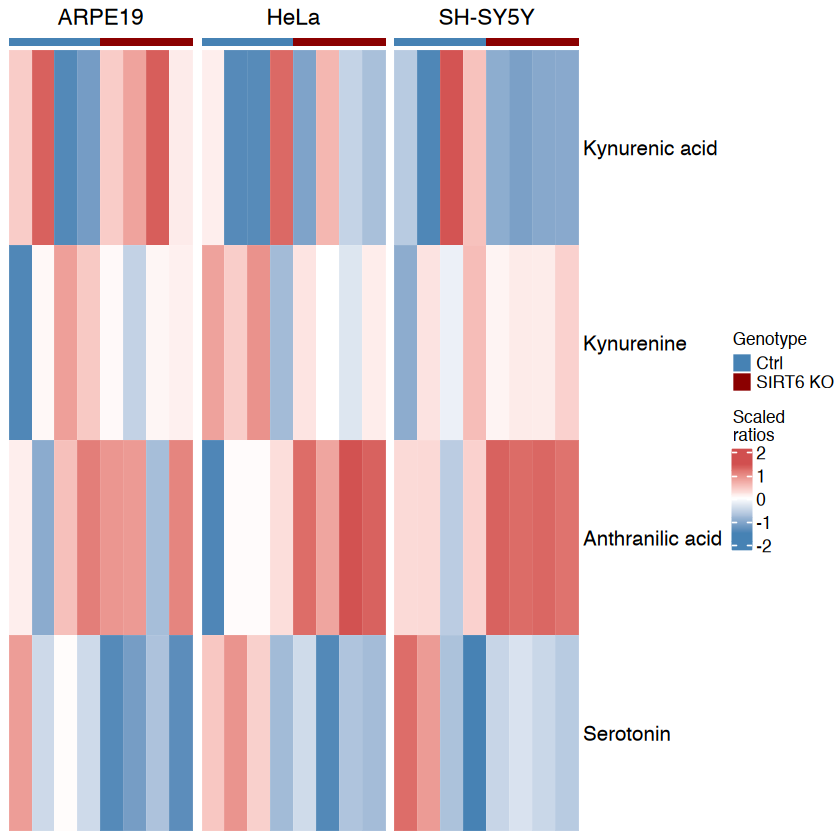

In [29]:
draw(h1 + h2 + h3, merge_legend = TRUE)